In [1]:
try:
    from undi import MuonNuclearInteraction
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('/home/misah/PARMA/WORK/undi-master/undi/')
    from undi import MuonNuclearInteraction
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
angtom=1.0e-10 # melementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second
a=9.5672616959 # V3Ge supercell lattice constant, in Angstrom

V_Quadrupole_moment =  -0.05e-28 # m^-2
Cu_Quadrupole_moment = -0.211e-28 # m^-2
OmegaQmu=0
OmegaQI=2.924e6  # Hz or s^-1  (= electronic_charge * Vzz * Quad moment / h)
eta=0

scale=1

atoms = [
    
    {'Position': np.array([0.124721254,   0.124772828,   0.124836008]) * a * angtom,
     'Label': 'mu'},

    {'Position': np.array([-0.0, 0.253818420,   0.125000491])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu,
     'OmegaQI': OmegaQI,
     'eta': eta,
    },
    
    {'Position': np.array([0.124979121,  -0.00,   0.253831436])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu,
     'OmegaQI': OmegaQI,
     'eta': eta,
    },
    
    {'Position': np.array([0.253794630,   0.124988309,  -0.0])*angtom*a,
     'Label': 'V',
     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
     'OmegaQmu': OmegaQmu,
     'OmegaQI': OmegaQI,
     'eta': eta,
    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     0.0])*angtom*a,
#    'Label': 'V',
#    'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#    # 'OmegaQmu': 3.2e6 # s^-1
#    },
#    
#    {'Position': np.array([0.5    ,    0.5   ,     1.0])*angtom*a,
#     'Label': 'V',
#     'ElectricQuadrupoleMoment': V_Quadrupole_moment,
#     # 'OmegaQmu': 3.2e6 # s^-1
#    }
]

In [3]:
elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second
h=6.6260693e-34 # Js
hbar=h/(2*np.pi) # Js

def Vzz_for_unit_charge_at_distance(p_mu, p_N):
    x=p_N-p_mu
    r = np.linalg.norm(x)
    r*=1.0e-0   # convert to angs
    epsilon0 = 8.8541878E-12 # ampere^2 ⋅ kilogram^−1 ⋅ meter^−3 ⋅ second^4
    elementary_charge=1.6021766E-19 # Coulomb = ampere ⋅ second
    Vzz = (2./(4 * np.pi * epsilon0)) * (elementary_charge / (r**3))
    return Vzz

def Vzz_from_Celio_PRL():
    # 0.27 angstrom^−3 is from PRL 39 836
    # (4 pi epsilon_0)^−1 (0.27 angstrom^−3) elementary_charge = 3.8879043E20 meter^−2 ⋅ volts
    Vzz = 1.02702 * 3.8879043E20 # the factor 1.02702 gives exactly 3.2e6 s^-1 for omega_q
    return Vzz


def Vzz_Vanad():
    # 0.27 angstrom^−3 is from PRL 39 836
    # (4 pi epsilon_0)^−1 (0.27 angstrom^−3) elementary_charge = 3.8879043E20 meter^−2 ⋅ volts
    Vzz = 1.02702 * 3.8879043E20 # the factor 1.02702 gives exactly 3.2e6 s^-1 for omega_q
    Vzz = 3.75187733297e+22
    return Vzz

def get_V(p_mu, p_N, Vzz):
    x=p_N-p_mu
    n = np.linalg.norm(x)
    x /= n; r = 1. # keeping formula below for clarity
    return -Vzz * ( (3.*np.outer(x,x)-np.eye(3)*(r**2))/r**5 )


# for idx, atom in enumerate(atoms):
#     if atom['Label'] == 'V':
#         atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
#                                   Vzz_Vanad())


# dis=a0/2  

# for idx, atom in enumerate(atoms):
#     if atom['Label'] != 'mu':
#          atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
#                                    Vzz_for_unit_charge_at_distance(atoms[0]['Position'], atom['Position']))
# print(atoms[idx]['EFGTensor'])
# print(Vzz_from_Celio_PRL())
# ee, ev = 1*np.linalg.eig(1*atoms[idx]['EFGTensor'])
# Vxx,Vyy,Vzz = np.sort(np.abs(ee))
# print(Vxx,Vyy,Vzz)
# sp=3.5
# cu_q=0.27e30*elementary_charge
# factor=10  # a factor to increase the efg
# Omaga=(3*elementary_charge*factor*Vzz*V_Quadrupole_moment)/(hbar*4*sp*(2*sp-1))
# print(Omaga)
# print(Vzz_for_unit_charge_at_distance(atoms[0]['Position'], atom['Position']))
# print('ratio = ',Vzz_for_unit_charge_at_distance(atoms[0]['Position'], atom['Position'])/Vzz_from_Celio_PRL())

In [4]:
###########################################################
# measure process time
t0 = time.clock()
# measure wall time
t0 = time.time()
###########################################################

ttime=18
steps = 200
n=1000
tlist = np.linspace(0, ttime*1e-6, steps)
signals = np.zeros([n,steps], dtype=np.float)

# efgray=np.arange(10,15,5)

# for efg, j in enumerate(efgray):
#     for idx, atom in enumerate(atoms):
#         if atom['Label'] == 'V':
#             atoms[idx]['EFGTensor'] = get_V(atoms[0]['Position'], atom['Position'], \
#                                       j*Vzz_for_unit_charge_at_distance(1.71*angtom))
            
#             #print(atoms[idx])

##############################################################################

threetups = []
for idx, Bmod in enumerate(range(n)):
    NS = MuonNuclearInteraction(atoms, log_level='info')
    threetups.append(NS.random_three_vector())
    #print(np.array(threetups[idx]))
    NS.translate_rotate_sample_vec(np.array(threetups[idx]))
    #NS.translate_rotate_sample_vec(np.array([1.,1.,1.]))
    print("Computing signal 4 times with ZF {} T...".format(Bmod+1), end='', flush=True)
    signal_Cu = NS.celio(tlist,  k=2 )
    #signal_Cu = NS.celio(tlist,  k=2, direction=np.array(threetups[idx]) )
    for i in range(3):
        print('{}...'.format(i+1), end='', flush=True)
        signal_Cu += NS.celio(tlist, k=2 )
        #signal_Cu += NS.celio(tlist, k=2, direction=np.array(threetups[idx]) )
    print('done!')
    signal_Cu /= float(i+1+1)
    
    del NS
    
    signals[idx]=signal_Cu
##############################################################################

# if True:
#     NS = MuonNuclearInteraction(atoms, log_level='info')

#     # rotate the sumple such that the muon spin is aligned with
#     # the 111 direction (and, just for convenience, the muon position is
#     # set to (0,0,0) )
#     n=3
#     threetups = []
#     for k in range(n):
#         threetups.append(NS.random_three_vector())
#         #print(threetups[k])
#         NS.translate_rotate_sample_vec(np.array(threetups[k]))
#         print("Computing signal 4 times with ZF with  {} times efg...".format(0), end='', flush=True)
#         signal_Cu = NS.celio(tlist,  k=2)
#         for i in range(3):
#             print('{}...'.format(i+1), end='', flush=True)
#             signal_Cu += NS.celio(tlist, k=2)
#         print('done!')
#         signal_Cu /= float(i+1+1)
#     signal_Cu /= float(k+1+1)
#     del NS

#     signals=signal_Cu    

##################################################################################################

#     NS.translate_rotate_sample_vec(np.array([1.,1.,1.]))

#     print("Computing signal 4 times with ZF with  {} times efg...".format(0), end='', flush=True)
#     signal_Cu = NS.celio(tlist,  k=2)
#     for i in range(3):
#         print('{}...'.format(i+1), end='', flush=True)
#         signal_Cu += NS.celio(tlist, k=2)
#     print('done!')
#     signal_Cu /= float(i+1+1)
#     del NS

#     signals=signal_Cu

# """
# ...and the results is:
# """

# fig, axes = plt.subplots(1,1)
# for i, Bmod in enumerate(efgray):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, signals[i], label='{} G'.format(Bmod*1e4), linestyle='-', color=color)
# axes.set_ylim((-0.3,1.1))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# plt.legend()
# plt.show()

###########################################################
# measure process time
print (time.clock(), "seconds process time")
# measure wall time
print( time.time() - t0, "seconds wall time")
###########################################################

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


Computing signal 4 times with ZF 1 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 2 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 3 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 4 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 5 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 6 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 7 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 8 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 9 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 10 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 11 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 12 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 13 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 14 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 15 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 16 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 17 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 18 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 19 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 20 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 21 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 22 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 23 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 24 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 25 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 26 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 27 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 28 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 29 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 30 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 31 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 32 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 33 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 34 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 35 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 36 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 37 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 38 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 39 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 40 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 41 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 42 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 43 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 44 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 45 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 46 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 47 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 48 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 49 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 50 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 51 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 52 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 53 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 54 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 55 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 56 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 57 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 58 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 59 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 60 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 61 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 62 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 63 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 64 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 65 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 66 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 67 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 68 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 69 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 70 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 71 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 72 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 73 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 74 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 75 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 76 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 77 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 78 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 79 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 80 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 81 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 82 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 83 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 84 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 85 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 86 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 87 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 88 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 89 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 90 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 91 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 92 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 93 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 94 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 95 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 96 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 97 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 98 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 99 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 100 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 101 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 102 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 103 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 104 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 105 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 106 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 107 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 108 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 109 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 110 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 111 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 112 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 113 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 114 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 115 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 116 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 117 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 118 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 119 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 120 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 121 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 122 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 123 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 124 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 125 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 126 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 127 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 128 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 129 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 130 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 131 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 132 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 133 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 134 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 135 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 136 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 137 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 138 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 139 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 140 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 141 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 142 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 143 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 144 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 145 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 146 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 147 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 148 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 149 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 150 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 151 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 152 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 153 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 154 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 155 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 156 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 157 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 158 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 159 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 160 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 161 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 162 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 163 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 164 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 165 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 166 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 167 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 168 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 169 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 170 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 171 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 172 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 173 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 174 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 175 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 176 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 177 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 178 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 179 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 180 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 181 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 182 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 183 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 184 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 185 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 186 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 187 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 188 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 189 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 190 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 191 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 192 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 193 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 194 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 195 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 196 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 197 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 198 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 199 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 200 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 201 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 202 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 203 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 204 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 205 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 206 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 207 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 208 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 209 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 210 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 211 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 212 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 213 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 214 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 215 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 216 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 217 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 218 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 219 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 220 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 221 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 222 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 223 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 224 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 225 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 226 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 227 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 228 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 229 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 230 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 231 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 232 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 233 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 234 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 235 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 236 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 237 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 238 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 239 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 240 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 241 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 242 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 243 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 244 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 245 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 246 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 247 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 248 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 249 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 250 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 251 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 252 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 253 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 254 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 255 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 256 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 257 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 258 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 259 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 260 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 261 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 262 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 263 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 264 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 265 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 266 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 267 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 268 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 269 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 270 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 271 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 272 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 273 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 274 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 275 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 276 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 277 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 278 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 279 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 280 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 281 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 282 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 283 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 284 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 285 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 286 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 287 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 288 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 289 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 290 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 291 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 292 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 293 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 294 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 295 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 296 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 297 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 298 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 299 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 300 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 301 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 302 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 303 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 304 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 305 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 306 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 307 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 308 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 309 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 310 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 311 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 312 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 313 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 314 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 315 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 316 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 317 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 318 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 319 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 320 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 321 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 322 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 323 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 324 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 325 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 326 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 327 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 328 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 329 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 330 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 331 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 332 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 333 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 334 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 335 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 336 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 337 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 338 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 339 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 340 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 341 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 342 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 343 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 344 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 345 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 346 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 347 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 348 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 349 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 350 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 351 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 352 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 353 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 354 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 355 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 356 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 357 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 358 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 359 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 360 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 361 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 362 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 363 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 364 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 365 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 366 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 367 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 368 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 369 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 370 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 371 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 372 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 373 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 374 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 375 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 376 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 377 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 378 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 379 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 380 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 381 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 382 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 383 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 384 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 385 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 386 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 387 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 388 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 389 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 390 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 391 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 392 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 393 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 394 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 395 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 396 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 397 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 398 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 399 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 400 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 401 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 402 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 403 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 404 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 405 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 406 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 407 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 408 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 409 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 410 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 411 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 412 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 413 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 414 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 415 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 416 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 417 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 418 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 419 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 420 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 421 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 422 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 423 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 424 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 425 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 426 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 427 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 428 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 429 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 430 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 431 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 432 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 433 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 434 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 435 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 436 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 437 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 438 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 439 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 440 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 441 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 442 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 443 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 444 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 445 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 446 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 447 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 448 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 449 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 450 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 451 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 452 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 453 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 454 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 455 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 456 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 457 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 458 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 459 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 460 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 461 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 462 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 463 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 464 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 465 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 466 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 467 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 468 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 469 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 470 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 471 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 472 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 473 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 474 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 475 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 476 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 477 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 478 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 479 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 480 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 481 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 482 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 483 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 484 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 485 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 486 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 487 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 488 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 489 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 490 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 491 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 492 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 493 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 494 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 495 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 496 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 497 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 498 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 499 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 500 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 501 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 502 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 503 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 504 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 505 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 506 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 507 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 508 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 509 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 510 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 511 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 512 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 513 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 514 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 515 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 516 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 517 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 518 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 519 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 520 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 521 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 522 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 523 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 524 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 525 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 526 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 527 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 528 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 529 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 530 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 531 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 532 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 533 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 534 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 535 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 536 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 537 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 538 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 539 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 540 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 541 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 542 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 543 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 544 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 545 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 546 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 547 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 548 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 549 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 550 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 551 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 552 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 553 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 554 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 555 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 556 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 557 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 558 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 559 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 560 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 561 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 562 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 563 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 564 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 565 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 566 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 567 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 568 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 569 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 570 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 571 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 572 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 573 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 574 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 575 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 576 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 577 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 578 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 579 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 580 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 581 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 582 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 583 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 584 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 585 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 586 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 587 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 588 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 589 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 590 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 591 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 592 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 593 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 594 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 595 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 596 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 597 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 598 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 599 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 600 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 601 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 602 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 603 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 604 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 605 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 606 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 607 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 608 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 609 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 610 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 611 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 612 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 613 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 614 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 615 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 616 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 617 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 618 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 619 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 620 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 621 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 622 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 623 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 624 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 625 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 626 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 627 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 628 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 629 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 630 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 631 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 632 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 633 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 634 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 635 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 636 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 637 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 638 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 639 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 640 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 641 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 642 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 643 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 644 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 645 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 646 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 647 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 648 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 649 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 650 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 651 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 652 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 653 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 654 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 655 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 656 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 657 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 658 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 659 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 660 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 661 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 662 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 663 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 664 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 665 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 666 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 667 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 668 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 669 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 670 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 671 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 672 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 673 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 674 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 675 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 676 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 677 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 678 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 679 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 680 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 681 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 682 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 683 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 684 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 685 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 686 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 687 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 688 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 689 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 690 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 691 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 692 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 693 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 694 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 695 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 696 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 697 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 698 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 699 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 700 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 701 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 702 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 703 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 704 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 705 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 706 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 707 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 708 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 709 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 710 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 711 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 712 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 713 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 714 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 715 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 716 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 717 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 718 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 719 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 720 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 721 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 722 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 723 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 724 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 725 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 726 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 727 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 728 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 729 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 730 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 731 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 732 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 733 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 734 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 735 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 736 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 737 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 738 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 739 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 740 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 741 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 742 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 743 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 744 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 745 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 746 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 747 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 748 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 749 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 750 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 751 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 752 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 753 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 754 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 755 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 756 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 757 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 758 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 759 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 760 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 761 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 762 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 763 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 764 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 765 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 766 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 767 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 768 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 769 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 770 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 771 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 772 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 773 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 774 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 775 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 776 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 777 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 778 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 779 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 780 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 781 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 782 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 783 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 784 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 785 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 786 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 787 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 788 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 789 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 790 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 791 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 792 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 793 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 794 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 795 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 796 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 797 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 798 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 799 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 800 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 801 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 802 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 803 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 804 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 805 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 806 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 807 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 808 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 809 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 810 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 811 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 812 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 813 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 814 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 815 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 816 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 817 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 818 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 819 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 820 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 821 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 822 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 823 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 824 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 825 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 826 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 827 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 828 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 829 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 830 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 831 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 832 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 833 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 834 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 835 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 836 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 837 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 838 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 839 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 840 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 841 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 842 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 843 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 844 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 845 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 846 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 847 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 848 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 849 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 850 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 851 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 852 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 853 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 854 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 855 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 856 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 857 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 858 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 859 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 860 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 861 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 862 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 863 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 864 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 865 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 866 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 867 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 868 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 869 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 870 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 871 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 872 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 873 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 874 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 875 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 876 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 877 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 878 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 879 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 880 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 881 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 882 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 883 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 884 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 885 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 886 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 887 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 888 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 889 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 890 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 891 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 892 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 893 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 894 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 895 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 896 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 897 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 898 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 899 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 900 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 901 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 902 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 903 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 904 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 905 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 906 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 907 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 908 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 909 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 910 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 911 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 912 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 913 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 914 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 915 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 916 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 917 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 918 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 919 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 920 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 921 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 922 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 923 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 924 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 925 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 926 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 927 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 928 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 929 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 930 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 931 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 932 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 933 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 934 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 935 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 936 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 937 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 938 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 939 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 940 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 941 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 942 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 943 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 944 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 945 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 946 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 947 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 948 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 949 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 950 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 951 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 952 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 953 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 954 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 955 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 956 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 957 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 958 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 959 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 960 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 961 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 962 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 963 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 964 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 965 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 966 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 967 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 968 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 969 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 970 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 971 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 972 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 973 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 974 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 975 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 976 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 977 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 978 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 979 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 980 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 981 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 982 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 983 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 984 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 985 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 986 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 987 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 988 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 989 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 990 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 991 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 992 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 993 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 994 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 995 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 996 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 997 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 998 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 999 T...1...2...3...

INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Using most abundand isotope for V, i.e. 51V, 0.9975 abundance
INFO:undi:Hilbert space is 1024 dimensional


done!
Computing signal 4 times with ZF 1000 T...1...2...3...done!
5875.802913 seconds process time
2306.393457889557 seconds wall time


In [5]:
fi='SecondSiteNoScaleMYDay3-Orien-'
#fi='SecondSiteNoPowderAverageMYDay3-Orien-'
np.savez(fi+str(n)+'.npz',signals)
file=np.load(fi+str(n)+'.npz')
file.files
A=file['arr_0']
# for i in range(n):
#     print(A[i])

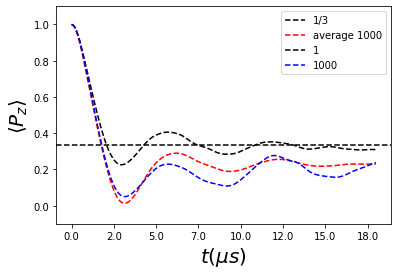

In [6]:
### to see with different direction
fig, axes = plt.subplots(1,1)
axes.axhline(y=1/3., color='k', ls='--', label='1/3')
axes.plot(tlist,signals.sum(axis=0)/float(n),'r--',label='average '+str(n))
axes.plot(tlist,signals[0],'k--',label='1 ')
axes.plot(tlist,signals[-1],'b--',label=str(n))
# for idx, Bmod in enumerate(range(n)):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, signals[idx], label='{}d'.format(Bmod), linestyle='-', color=color)
axes.set_ylim((-0.1,1.1))
ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
axes.set_xlabel(r'$t (\mu s)$', fontsize=20)
axes.set_ylabel(r'$\left<P_z\right>$', fontsize=20);
plt.legend()
plt.show()

In [7]:
# ### to see with different direction
# fig, axes = plt.subplots(1,1)
# axes.axhline(y=1/3., color='k', ls='--', label='1/3')
# axes.plot(tlist,signals.sum(axis=0)/float(n),'r--',label='average')
# for idx, Bmod in enumerate(range(n)):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, signals[idx], label='{}d'.format(Bmod), linestyle='-', color=color)
# axes.set_ylim((-0.1,1.1))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# axes.set_xlabel(r'$t (\mu s)$', fontsize=20)
# axes.set_ylabel(r'$\left<P_z\right>$', fontsize=20);
# plt.legend()
# plt.show()

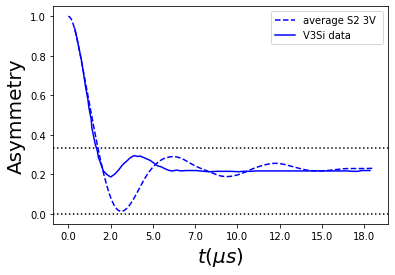

In [8]:
import numpy as np
import matplotlib.pyplot as plt
##### open a save file and plot
pre='data2'
filename = pre+'.dat'
ttime=18
tlist = np.linspace(0, ttime*1e-6, 200)
fi='SecondSiteNoScaleMYDay3-Orien-'
#fi='SecondSiteNoPowderAverageMYDay3-Orien-'
#n=10
file=np.load(fi+str(n)+'.npz')
file.files
A=file['arr_0']
# for i in range(n):
#     print(A[i])
A.sum(axis=0)/float(n)
a0=0.2191   # initial asymm for V3Ge
x,y=np.loadtxt(filename,unpack=True)
fig, axes = plt.subplots(1,1)
axes.axhline(y=1/3., color='k', ls=':')
axes.axhline(y=0., color='k', ls=':')
axes.plot(tlist,A.sum(axis=0)/float(n),'b--',label='average S2 3V ')#+str(n))
axes.plot(x*1e-6,y/a0, 'b',label='V3Si data ')
# axes.plot(tlist,A[0],'k--',label='1 ')
# axes.plot(tlist,A[-1],'b--',label=str(n))
# for idx, Bmod in enumerate(range(n)):
#     color = list(np.random.choice(range(256), size=3)/256)
#     axes.plot(tlist, A[idx], label='{}d'.format(Bmod), linestyle='-', color=color)
#axes.set_ylim((-0.1,1.1))
#axes.set_xlim((0.,18))
ticks = np.round(axes.get_xticks()*10.**6)
axes.set_xticklabels(ticks)
axes.set_xlabel(r'$t (\mu s)$', fontsize=20)
#axes.set_ylabel(r'$\left<P_z\right>$', fontsize=20);
axes.set_ylabel(r'Asymmetry', fontsize=20);
plt.legend()
plt.show()

In [9]:
# # ## the bamuba function
# sys.path.insert(0, '/home/misah/PARMA/WORK/undi-master/examples/v3ge/')
# import bamuba as b
# from bamuba import plot_bamuba
# tlist0 = np.linspace(0, 18, 1000)
# y=plot_bamuba(tlist0)
# a0=0.2191
# fig, axes = plt.subplots(1,1)
# #for i, Bmod in enumerate(efgray):
# color = list(np.random.choice(range(256), size=3)/256)
# axes.plot(tlist,signals.sum(axis=0)/float(n),'r--',label='average '+str(n))
# axes.plot(tlist0*1e-6,y/0.2191, label='Expt', linestyle=':')
# axes.axhline(y=(1*1)/3,label='1/3')
# axes.axhline(y=(2*1)/3,label='2/3')
# axes.set_ylim((-0.3,1.1))
# axes.set_xlim((0.,max(tlist)))
# ticks = np.round(axes.get_xticks()*10.**6)
# axes.set_xticklabels(ticks)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()